In [1]:
import matplotlib.pyplot as plt

## Построение линий

Для построения линий по точкам на плоскости используется метод  `plot()`: 
```python
plot(x, y, параметры)
```
где 

`x` –  список значений по оси X;

`y` – список значений по оси Y;

`параметры` – формат отображения линии на графике (ее характеристики).

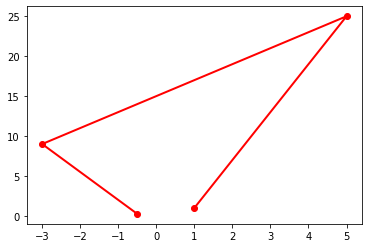

In [2]:
plt.plot([1, 5, -3, -0.5], [1, 25, 9, 0.25 ], color= "red", linewidth=2, marker="o")
plt.show()

### `setp()`

Есть альтернатива методу `plot()` -- это `setp()`, который вместо точек принимает линию.

Для того чтобы использовать метод `setp()` необходимо задать линию.

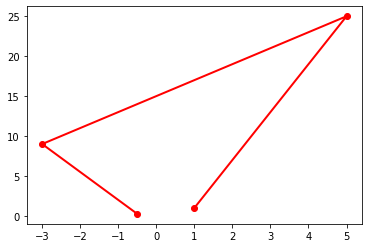

In [3]:
line = plt.plot([1, 5, -3, -0.5], [1, 25, 9, 0.25 ])

plt.setp(line, color= "red", linewidth=2, marker="o" )
plt.show()

## Оси координат

Для построения и настройки координатных осей используется метод `gca()`. На графике могут быть отображены 4 оси, обращения к которым осуществляются следующим образом:
```python
gca().spines["left"]
gca().spines["bottom"]
gca().spines["top"]
gca().spines["right"]
```
Для каждой из них можно указать ее расположение с помощью функции:
```python
set_position("значение")
```
где: 

`значение` – положение оси на графике, при этом можно задать:

`zero`  - в точке с координатой 0 по соответствующей оси;

`center` – по центру области вывода графиков.

Управление видимостью оси осуществляется с помощью метода:
```python
set_visible(значение)
```
в котором `значение` может быть либо `True` (если ось нужно показать, установлено по умолчанию), либо `False` (если ось нужно "спрятать").

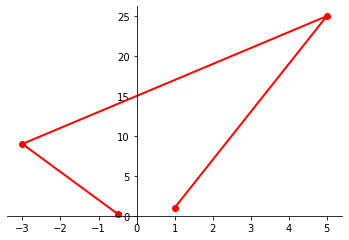

In [4]:
# СМЕСТИМ ОСИ

line = plt.plot([1, 5, -3, -0.5], [1, 25, 9, 0.25 ])
plt.setp(line, color="red", linewidth=2, marker="o" )

# устанавливаем две оси в положение zero
plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")

# скрываем остальные две
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

## Задание Step 10

Постройте графики следующих функций на интервале от $-240^{\circ}$ до $360^{\circ}$:
$$
\begin{equation*}
    f(x) = e^{\cos(x)} + \ln(\sin^2(0.8x)+1)\cdot\cos(x) \\
    y(x) = -\ln((\cos(x)+\sin(x))^2 + 1.7) +2
\end{equation*}
$$
На оси $OX$ должны быть отмечены значения в ГРАДУСАХ. 

**Пояснение**. 

Для вычисления функций **cos** и **sin** значения $x$ нужно перевести в радианы.

По графику ответьте на вопросы.

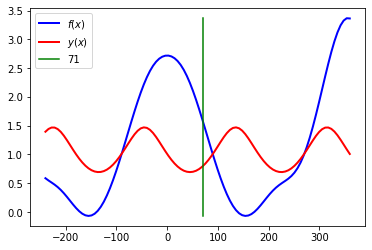

In [5]:
from math import cos, sin, log, exp, radians, pi
import matplotlib.pyplot as plt

def f_x(x):
    f1 = exp(cos(x))
    f2 = log(pow(sin(0.8*x), 2) + 1) * cos(x)
    return f1 +f2

def y_x(x):
    y1 = cos(x) + sin(x)
    return -log(y1**2 + 1.7) + 2

n = 100 # число разбиений отрезка  [a, b]
a, b = -240, 360 # в градусах
#a, b = 70, 72
h = (b - a) / (n - 1)

x_list_deg = [a + i * h for i in range(n)]
x_list_rad = [radians(x) for x in x_list_deg]

f_list = [f_x(x) for x in x_list_rad]
y_list = [y_x(x) for x in x_list_rad]
temp = f_list + y_list

plt.plot(x_list_deg, f_list, color= "blue", linewidth=2, label="$f(x)$")
plt.plot(x_list_deg, y_list, color= "red" , linewidth=2, label="$y(x)$")
plt.plot((71, 71), (max(temp), min(temp)), color='green', label="71")
plt.legend()
plt.show()

## Плоские геометрические фигуры

Плоские геометрические фигуры создаются с помощью библиотеки `matplotlib.patches`, из которой можно импортировать шаблоны для различных плоских геометрических фигур:
```python
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Arc, Path, PathPatch
```

* `Arc` - Для рисования дуг
* `Arrow` - Для рисования стрелок (см. также `ConnectionPatch`, `FancyArrowPatch` и `FancyArrow` в этом же модуле)
* `Circle` - Для рисования окружностей
* `CirclePolygon` - Для рисования равносторонних многоугольников
* `Ellipse` - Для рисования эллипсов
* `FancyBboxPatch` - Для рисования прямоугольников с разными типами границ (с закругленными углами, в виде стрелок, с зубчатыми ребрами и т.п.)
* `PathPatch` - Для рисования линий или замкнутых областей
* `Polygon` - Для рисования многоугольников
* `Rectangle` - Для рисования прямоугольников
* `Wedge` - Для рисования «клина» (сектора окружности)

### Алгоритм рисования
Все геометрические объекты рисуются в несколько шагов.

1. Импортируются все необходимые модули, функции, шаблоны:
```python
import matplotlib.pyplot as plt
from matplotlib.patches import  Circle
```
import matplotlib.pyplot as plt
2. Определяются координаты окна, в котором будет создаваться изображение, например, следующие операторы создают окно, координаты которого по горизонтали изменяются от 0 до 12 по горизонтали и вертикали:
```python
plt.xlim(0, 12)
plt.ylim(0, 12)
```
3. Создается область для рисования, связанная с осями координат с помощью метода gca():
```python
ax = plt.gca()
```
4. Создается геометрическая фигура на основе описания из модуля matplotlib.patches . Например, следующий оператор создает круг с центром в точке (6, 7) и радиусом 5 и заносит результат в переменную circle:
```python
circle = Circle((6, 7),5)
```
5. Созданная фигура добавляется в область ax с помощью метода add_patch():
```python
ax.add_patch(circle)
```
6. Рисунок отображается в графическом окне:
```python
plt.show()
```



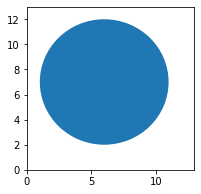

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import  Circle

fig = plt.figure(figsize=(3, 3))
plt.xlim(0, 13)
plt.ylim(0, 13)

ax = plt.gca()

circle = Circle((6, 7),5)
ax.add_patch(circle)
plt.show()

### Создание геометрической фигуры
Каждая геометрическая фигура создается методом  библиотеки `matplotlib.patches`, который имеет два типа параметров:
1. Значения, описывающие положение фигуры в области рисования, такие как координаты точек, радиусы, величины углов.
2. Свойства, описывающие стиль вывода каждой фигуры, общие для всех фигур.

#### Задание формы различных фигур
* `Rectangle((x, y), width, height)` -  создает прямоугольник, левый верхний угол которого располагается в точке с координатами `(x, y)`,  высота которого равна `width`, а длина - `height`.
* `Circle((x, y), radius)` -  создает круг с центром в точке `(x, y)`, радиуса `radius`.
* `Ellipse((x, y), width, height)` -  создает эллипс с центром в точке `(x, y)`,  диаметр которого по горизонтальной оси равен `width`, а диаметр по вертикальной - `height`.
* `Wedge((x, y), radius,  t1,  t2)` -  создает сектор с центром в точке `(x, y)`,  радиуса `radius`, ограниченный линиями углов `t1` и `t2`.
* `Arc((x, y), width, height, angle, t1, t2)`  - создает дугу с центром в точке `(x, y)`,  диаметр которой по горизонтальной оси равен `width`, а диаметр по вертикальной - `height`, угол поворота дуги относительно центра `angle`, дуга ограничена линиями углов `t1` и `t2`.
* `Polygon([(x0, y0), (x1, y1), (x2, y2), ... ], closed)` - создает ломаную линию по точкам `(x0, y0), (x1, y1), (x2, y2), ...`, если параметр `closed` равен `True` (или он отсутствует) , первая точка соединяется с последней, в противном случае `(closed=False)`, ломаная линия остается незамкнутой.

####  Стиль вывода
* `facecolor="цвет"` или `fc="цвет"` - цвет заливки фигуры
* `linewidth=значение` или `lw=значение` -	толщина границы фигуры
* `edgecolor="цвет"` или `ec="цвет"` -	цвет границы фигуры
* `fill=значение` - фигура закрашенная (`true`,  по умолчанию) или незакрашенная (`false`)


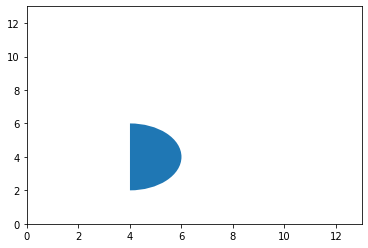

In [7]:
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Arc, Path, PathPatch

plt.xlim(0, 13)
plt.ylim(0, 13)

ax = plt.gca()

figure = Wedge((4, 4), 2, -90, 90)

ax.add_patch(figure)
plt.show()

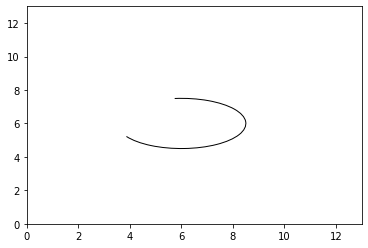

In [8]:
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Arc, Path, PathPatch

plt.xlim(0, 13)
plt.ylim(0, 13)

ax = plt.gca()

figure = Arc((6, 6), 5, 3, 0, 200, 100)

ax.add_patch(figure)
plt.show()

## Рисование линий, объединенных в пути
Совокупность линии можно рисовать с помощью так называемых путей (Path). Путь представляет собой список опорных точек (как при создании полигона) и список кодов, задающих, что с этими вершинами делать. Коды - это числовые константы, определенные в модуле Path, которые могут принимать значения `MOVETO` (переместиться в точку без рисования линии), `LINETO` (провести линию в заданную точку) и др. Коды можно записывать двумя способами: либо полной ссылкой типа `matplotlib.path.Path.MOVETO` или `matplotlib.path.Path.LINETO`, либо цифрой  `1` или `2` соответственно.

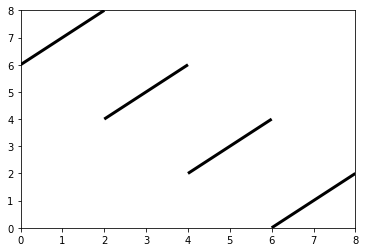

In [9]:
from matplotlib.patches import Path, PathPatch
import matplotlib.pyplot as plt

plt.xlim(0, 8)
plt.ylim(0, 8)
ax = plt.gca()

# Создадим список опорных точек
vertices = [(0, 6), (2, 8), (2, 4), (4, 6), (4, 2), (6,4), (6, 0), (8,2)]

# Создадим список кодов 
# В нашем случае установить курсор в первую точку (MOVETO), 
# провести линию во вторую (LINETO), 
# установить курсор в третью (MOVETO), провести линию в четвертую (LINETO) и т.д.
codes = [1, 2, 1, 2, 1, 2, 1, 2]

# Создадим переменную path c помощью метода matplotlib.patches.Path,  указав список вершин (vertices) и список кодов (codes):
path = Path(vertices, codes)

# Создадим фигуру, представляющую собой совокупность линий, толщиной 3 px:
path_patch = PathPatch(path, lw=3)

ax.add_patch(path_patch)
plt.show()

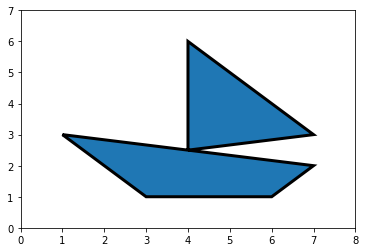

In [10]:
# STEP 15

from matplotlib.patches import Path, PathPatch
import matplotlib.pyplot as plt

n = 8 # размер области

m  = 7 # размер области

plt.xlim(0, n)

plt.ylim(0, m)

ax = plt.gca()

# создать массив точек
vertices = [(1, 3), (7, 2), (6, 1), (3, 1), (1, 3), (4, 2.5), (4, 6), (7, 3), (4, 2.5)]

# создать список кодов для последовательности рисования
# число 1 соответствует команде matplotlib.path.Path.MOVETO
# число 2 соответствует команде matplotlib.path.Path.LINETO
codes = [1, 2, 2, 2, 2, 1, 2, 2, 2]


#создать объект path
path = Path(vertices, codes)

#создать фигуру
path_patch = PathPatch(path, lw=3)

# Добавить созданную фигуру в область ax:
ax.add_patch(path_patch)

plt.show()

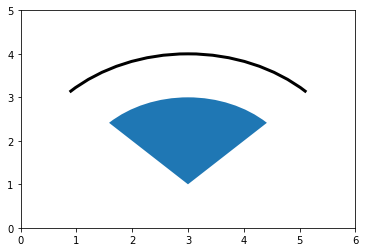

In [11]:
# STEP 16

from matplotlib.patches import Wedge, Arc

plt.xlim(0, 6)
plt.ylim(0, 5)
ax = plt.gca()

#вставить необходимые операторы

# нарисовать сектор (среди возможных вариантов указать  НАИМЕНЬШИЕ ПОЛОЖИТЕЛЬНЫЕ углы)
# сформировать сектор, параметры для цвета линии и заливки, а также толщины линии не указывать
figure_w = Wedge((3, 1), 2, 45, 135)
ax.add_patch(figure_w)

# нарисовать дугу (среди возможных вариантов указать НАИМЕНЬШИЕ ПОЛОЖИТЕЛЬНЫЕ углы
#с НУЛЕВЫМ углом поворота)
# дуга должна иметь определенную толщину (linewidth=3), цвет не указывать
figure_a = Arc((3, 1), 6, 6, 0, 45, 135, linewidth=3)
ax.add_patch(figure_a)

plt.show()